In [1]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
import pandas as pd
import corner
import time
from scipy.stats import multivariate_normal

plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'large'

from model_selection import Evidence_model_selection as EMS

# Experiment: 2 term truth with 1 moment
### Cannot be fit by a 1 term model

In [2]:
# Set up the experiment
nTruth = 2
nMoment = 1
param_Truth = [ 5.0,1.5, 0.75, -0.75]

In [3]:
# Initialize the model selection object
Ex1 = EMS(nTruth,nMoment,param_Truth)

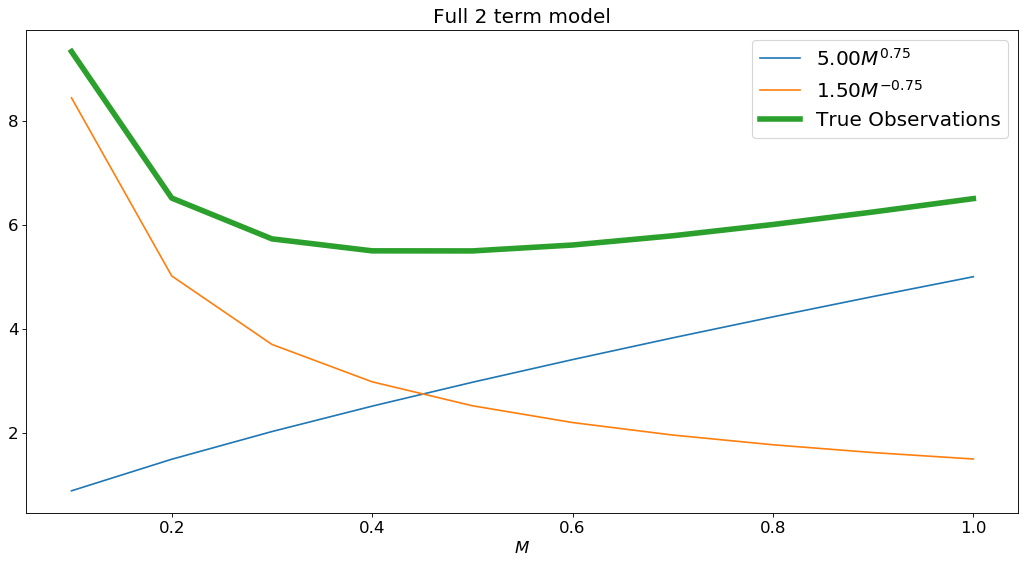

In [4]:
# Run a synthetic experiment and generate data, the data becomes an attribute of the object
Ex1.get_data()
# Plot the data
Ex1.plot_truth()

In [5]:
# Run model selection

# Models indicates how many models are being compared, the integer references the number of terms in the model
# dlnZ_tol is the tolerance for estimated the log evidence using thermodynamic integration
# MCMC_Steps is the number of steps in each MCMC chain

Ex1.model_selection(Models=[1, 2, 3], dlnZ_tol=0.5, MCMC_Steps=2000)

Model 1  has error > tolerance, increasing the number of temperatures to  95
      Current log evidence and estimation error: lnZ =  -36.43030032210243 , dlnZ =  0.7038127987258349
Model 1  has error > tolerance, increasing the number of temperatures to  115
      Current log evidence and estimation error: lnZ =  -36.54459180803595 , dlnZ =  0.5752065260258092
Model 2  has error > tolerance, increasing the number of temperatures to  155
      Current log evidence and estimation error: lnZ =  -11.810951680963726 , dlnZ =  0.600994924660446
Model 2  has error > tolerance, increasing the number of temperatures to  175
      Current log evidence and estimation error: lnZ =  -11.903252929618715 , dlnZ =  0.5239965478911532

Results:
Model 1 with  lnZ =  -36.68717979348809 , dlnZ =  0.48395403508458656
Model 2 with  lnZ =  -12.0224222416681 , dlnZ =  0.47303911414985933
Model 3 with  lnZ =  -12.316425667635643 , dlnZ =  0.4266765910342638

===== WARNING ======

The model selection is inconcl

In [6]:
# Run a long MCMC simulation for the selected model to view the parameter space

Ex1.ntemps = 10 # Reset the number of temperatures used to make the long MCMC simulation shorter

sampler = Ex1.run_MCMC(nTerms=Ex1.selected_model,MCMC_Steps = int(1E4))

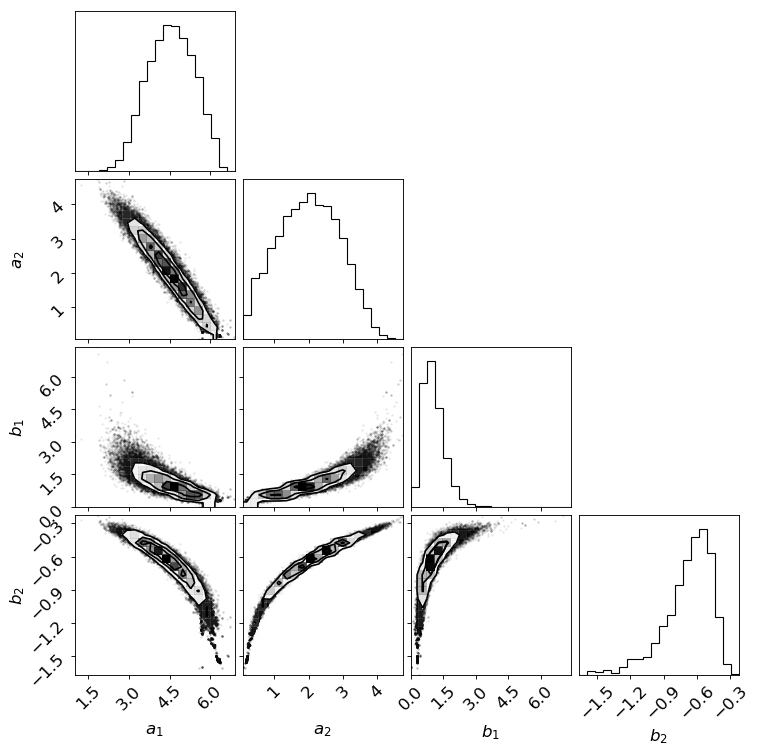

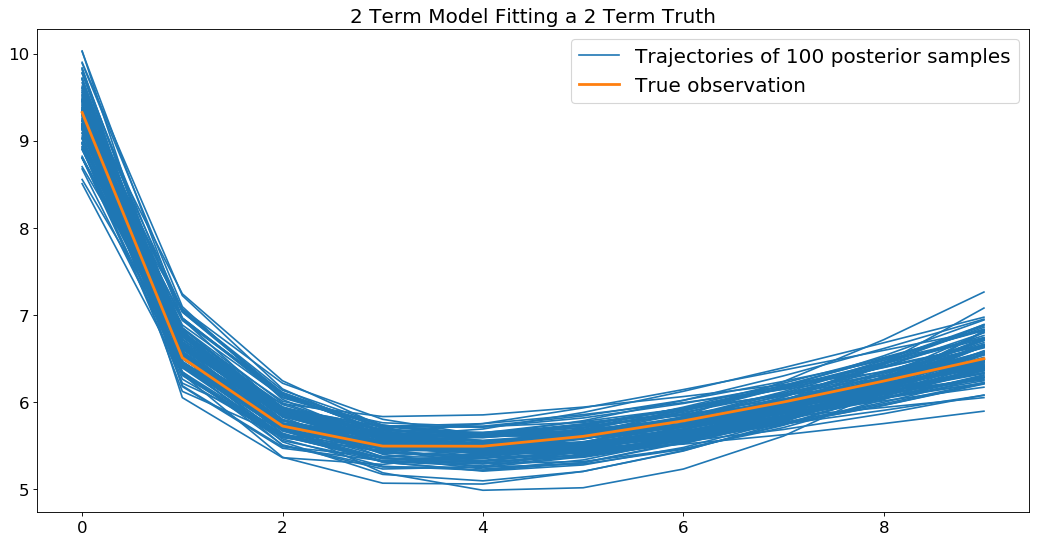

In [7]:
# Plot the results
Ex1.plot_sampler(sampler,nTerms=Ex1.selected_model)